In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Создаем данные для графика
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Создаем 3D-график
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

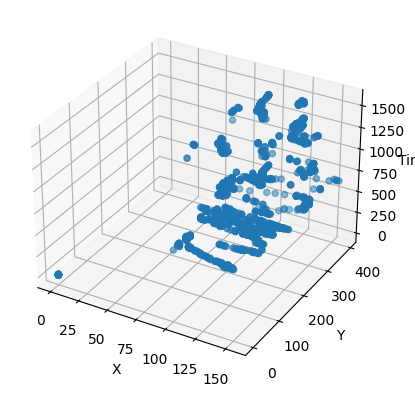

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from find_pupils_class import find_pupils
import plotly.express as px


# загрузить видеофайл
cap = cv2.VideoCapture('videoplayback.mp4')

# проверить, открыт ли файл успешно
if not cap.isOpened():
    print("Не удалось открыть видеофайл")

coordinates_arr = np.array([[0,0,0,0,0]]) # № кадра, x1, y1, x2, y2
i = 0 # № кадра

# прочитать первый кадр из видео
ret, img = cap.read()
old_row = [[0,0,0,0,0]]

while ret:
    new_row = find_pupils(i,img,old_row)
    coordinates_arr = np.append(coordinates_arr, new_row, axis=0)
    i += 1
    ret, img = cap.read()
    old_row = new_row


# Извлекаем значения по осям x, y, z из матрицы
x = [row[1] for row in coordinates_arr]
y = [row[2] for row in coordinates_arr]
z = [row[0] for row in coordinates_arr]

# Создаем 3D-диаграмму
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Устанавливаем метки осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')

# Отображаем диаграмму
plt.show()

df_pca_3 = pd.DataFrame(coordinates_arr,columns = ['Time','X','Y','X2','Y2'])
fig = px.scatter_3d(df_pca_3, x = 'X2', y = 'Y2', z = 'Time').update_traces(marker = dict(size = 2,color = "#C00000"))
fig.show()
fig = px.scatter_3d(df_pca_3, x = 'X', y = 'Y', z = 'Time').update_traces(marker = dict(size = 2,color = "#C00000"))
fig.show()

# освободить ресурсы
cap.release()
